In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import torch

# Character Model Summary

The character model is a simple model that uses a character-level embedding to predict the next character in a sequence. The model is trained on a dataset of text sequences and is able to generate new text sequences by predicting the next character in the sequence. 

The chosen architecture for the model is a casual language model based on the transformer architecture. The model consists of an embedding layer, a transformer encoder, and a linear layer. The embedding layer converts the input characters into a dense representation that is used as input to the transformer encoder. The transformer encoder processes the input sequence and produces a hidden representation that is used as input to the linear layer. The linear layer predicts the next character in the sequence based on the hidden representation produced by the transformer encoder.

The above architecture was chosen after reviewing the literature on language modeling and transformer architectures, specifically the following articles:
1. https://medium.com/@tom_21755/understanding-causal-llms-masked-llm-s-and-seq2seq-a-guide-to-language-model-training-d4457bbd07fa
2. https://ankitasinha0811.medium.com/intuition-for-encoder-based-models-vs-decoder-based-models-f7dd4e189cad#:~:text=In%20conclusion%2C%20an%20Encoder%20is,has%20been%20pre%2Dtrained%20on.
3. https://arxiv.org/pdf/2305.03819

The paper "Adapting Transformer Language Models for Predictive Typing in Brain-Computer Interfaces" adapts several wordpiece-level Transformer LMs to make character predictions and evaluates them on typing task, for brain computer interface. This paper was used as a reference for the character model architecture and training process.

## Datasets

### Enwik8 Dataset

The enwik8 dataset is the first 100,000,000 (100M) bytes of the English Wikipedia XML dump on Mar. 3, 2006 and is typically used to measure a model's ability to compress data.

### Text8 Dataset

The Text8 dataset is derived from the Wikipedia dump of 2006. It contains the first 100 million characters of English Wikipedia, specifically focusing on plain text without any markup or metadata.
The dataset includes only the lowercase English letters a-z and spaces, with all other characters removed. This makes it a clean and simplified dataset suitable for character-level language modeling.

90% of the dataset is used for training, 5% for validation, and 5% for testing.

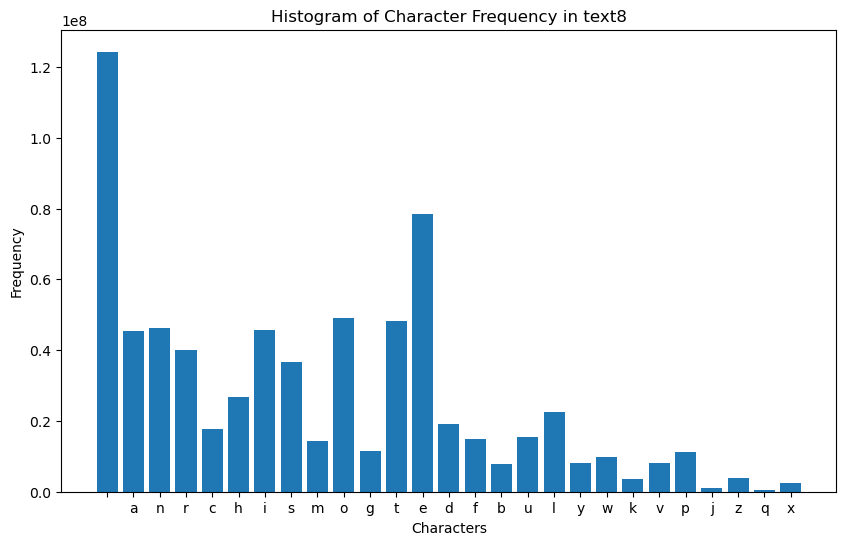

In [2]:
# plot histogram of the number of chars
with open('../data/text8/text8.txt', 'r') as f:
    text = f.read()
    
text = text.replace('\n', ' ')

char_count = Counter(text)

chars = list(char_count.keys())
counts = list(char_count.values())

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(chars, counts)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Character Frequency in text8')
plt.show()

### IMDB Dataset

The IMDB dataset contains 12,000 sentences of IMDBs' movie reviews. After filtering, the dataset contains the lowercase English letters a-z and spaces, with all other characters removed. This makes it a clean and simplified dataset suitable for character-level language modeling.

80% of the dataset is used for training, 10% for validation, and 10% for testing.

/home/yoavjavits/miniconda3/envs/HSC/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


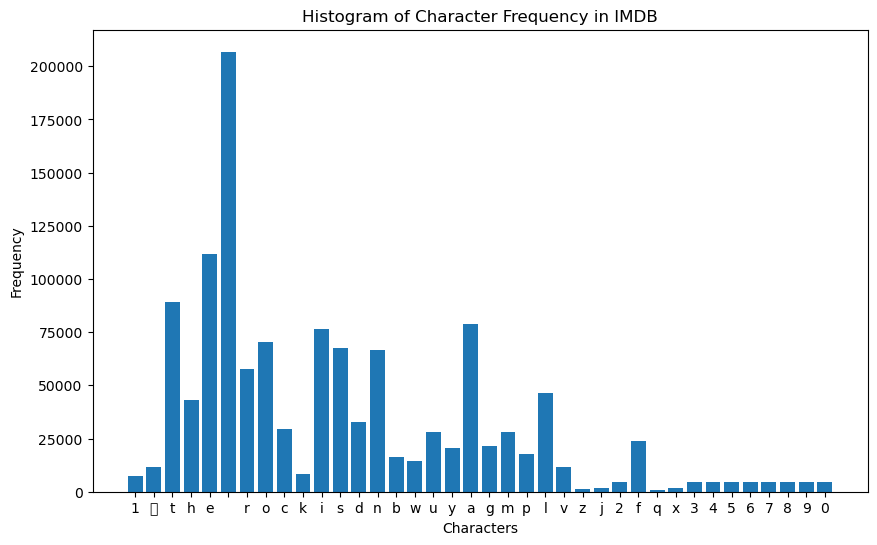

In [3]:
# plot histogram of the number of chars
with open('../data/sentences/datasetSentencesValid.txt', 'r') as f:
    text = f.read()

text = text.replace('\n', ' ')

char_count = Counter(text)

chars = list(char_count.keys())
counts = list(char_count.values())

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(chars, counts)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Character Frequency in IMDB')
plt.show()

### Wiki2 Dataset 

The WikiText-2 dataset is derived from Wikipedia articles. It was curated to create a large, clean, and diverse corpus of text suitable for training language models. The dataset contains the text from articles that are less pre-processed compared to other datasets. It includes a variety of topics, making it a good general-purpose dataset for language modeling. The text in WikiText-2 retains capitalization, punctuation, and special characters, unlike the simplified and heavily filtered Text8 dataset.

Training Set: 2,088,628 tokens.
Validation Set: 217,646 tokens.
Test Set: 245,569 tokens.
The dataset contains approximately 600 unique tokens.

## Model Architecture

As mentioned earlier, the model architecture is based on decoder-only transformer architecture, for casual language modeling task.
We trained few models and chose the best one based on the test set performance.

## Models' Results

## Reformer Model

Reformer model is a transformer model that uses locality-sensitive hashing (LSH) to reduce the memory complexity of the model. The model is pre-trained on the 'enwik8' dataset by google, and fine-tuned on the 'sentences IMDB' dataset by me.

### Architecture

In [4]:
model_path = '../models/reformer/model_1/model.pt'
model = torch.load(model_path)
print(model)

ReformerModelWithLMHead(
  (reformer): ReformerModel(
    (embeddings): ReformerEmbeddings(
      (word_embeddings): Embedding(258, 1024)
      (position_embeddings): PositionEmbeddings(
        (embedding): Embedding(512, 1024)
      )
    )
    (encoder): ReformerEncoder(
      (layers): ModuleList(
        (0-1): 2 x ReformerLayer(
          (attention): ReformerAttention(
            (layer_norm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
            (self_attention): LocalSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=False)
              (key): Linear(in_features=1024, out_features=1024, bias=False)
              (value): Linear(in_features=1024, out_features=1024, bias=False)
            )
            (output): ReformerSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=False)
            )
          )
          (feed_forward): ChunkReformerFeedForward(
            (layer_norm): LayerNorm((1024,

### Loss 

In [5]:
file_path = '../models/reformer/model_1/log_shortened.txt'
with open(file_path, 'r') as file:
    print(file.read())

Epoch: 1
Training Average loss: 1.5842
Evaluation Average loss: 1.2836, Evaluation Accuracy: 0.5991

Epoch: 2
Training Average loss: 1.2537
Evaluation Average loss: 1.2258, Evaluation Accuracy: 0.6203

Epoch: 3
Training Average loss: 1.1386
Evaluation Average loss: 1.2281, Evaluation Accuracy: 0.6273

Epoch: 4
Training Average loss: 1.0388
Evaluation Average loss: 1.2737, Evaluation Accuracy: 0.6281

Epoch: 5
Training Average loss: 0.9383
Evaluation Average loss: 1.3577, Evaluation Accuracy: 0.6254

Epoch: 6
Training Average loss: 0.8358
Evaluation Average loss: 1.4770, Evaluation Accuracy: 0.6222

Epoch: 7
Training Average loss: 0.7339
Evaluation Average loss: 1.6258, Evaluation Accuracy: 0.6193


### Evaluation

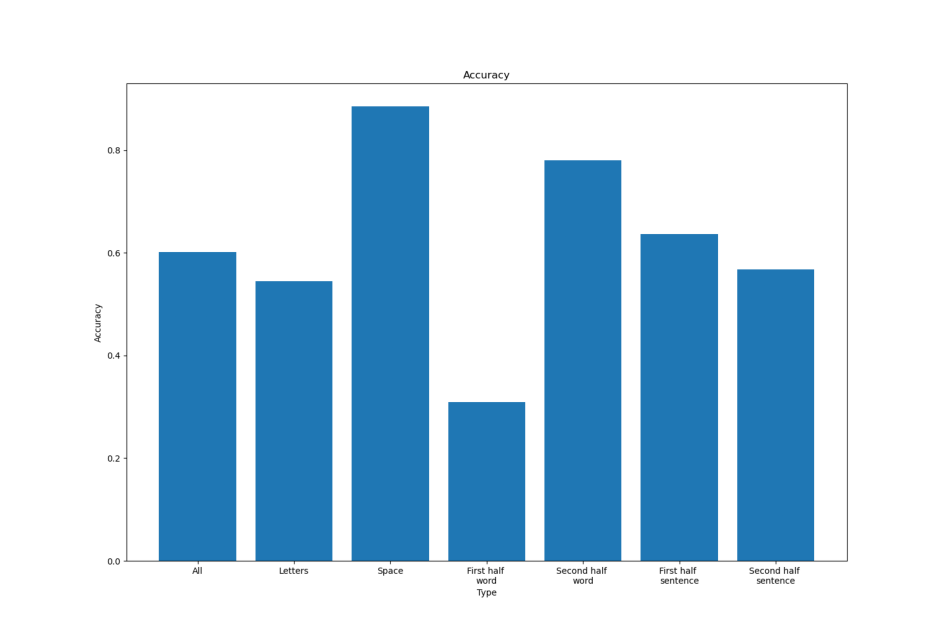

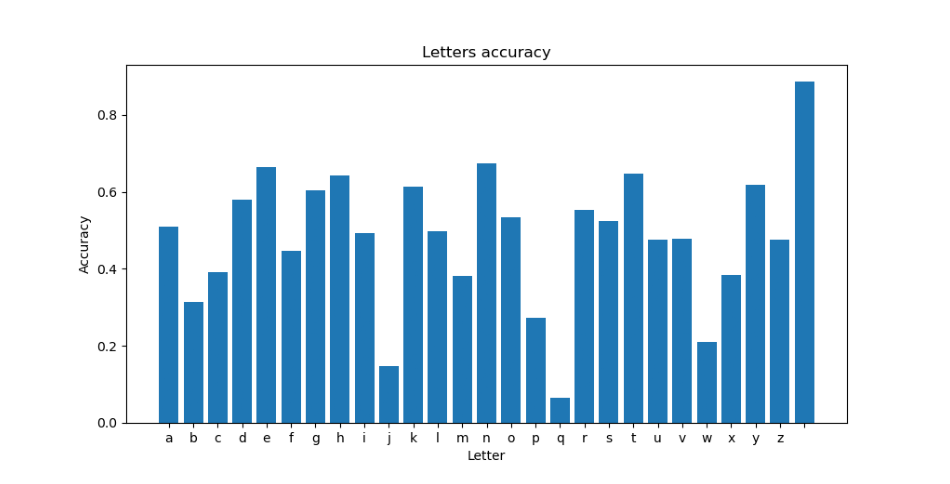

In [6]:
img = plt.imread('../models/reformer/model_1/evaluation/accuracy_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

img = plt.imread('../models/reformer/model_1/evaluation/letters_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Sentence for example

In [7]:
path_file = '../models/reformer/model_1/evaluation/restored_sentences.txt'

num_example = 5
with open(path_file, 'r') as file:
    for i in range(num_example*4):
        print(file.readline()[:-1])

Original: everytime you think undercover brother has run out of steam it finds a new way to surprise and amuse
Restored: e er  hme aou chink tpder uver teokherstan aen out of toavl an sends t sew yay to sesprise tnd t ase
Accuracy: 0.6400 | Letters accuracy: 0.5732 | Backspace accuracy: 0.9444 | First half word accuracy: 0.3171 | Second half word accuracy: 0.8293

Original: part of the charm of satin rouge is that it avoids the obvious with humour and lightness
Restored: pect of the soaraiof todireaemthstn ahet it sloids the snvious palhoaimarr and tifhtness
Accuracy: 0.6023 | Letters accuracy: 0.5694 | Backspace accuracy: 0.7500 | First half word accuracy: 0.3611 | Second half word accuracy: 0.7778

Original: manages to be original even though it rips off many of its ideas
Restored: mancges to be aniginal aner ihough it sess off tony of tts oneas
Accuracy: 0.7656 | Letters accuracy: 0.7115 | Backspace accuracy: 1.0000 | First half word accuracy: 0.4615 | Second half word accuracy: 0.9

## Text8 Model

Text8 model is a transformer model that is trained on the 'text8' dataset, and fine-tuned on the 'sentences IMDB' dataset.

### Parameters

In [8]:
file_path = '../models/text8_only/model_2/model_params.txt'
with open(file_path, 'r') as file:
    print(file.read())

Embed size: 512
Number of heads: 8
Number of layers: 8
Number of hidden units: 1024
Dropout: 0.2
BPTT: 100


### Loss

In [9]:
file_path = '../models/text8_only/model_2/log.txt'
with open(file_path, 'r') as file:
    print(file.read())

====> Epoch: 1 Average loss: 1.5757
====> Evaluation Average loss: 1.4310, Accuracy: 0.5546
Evaluation Epoch 1 ====> Evaluation Average loss: 1.4310, Accuracy: 0.5546

====> Epoch: 2 Average loss: 1.4904
====> Evaluation Average loss: 1.3947, Accuracy: 0.5658
Evaluation Epoch 2 ====> Evaluation Average loss: 1.3947, Accuracy: 0.5658

====> Epoch: 3 Average loss: 1.4499
====> Evaluation Average loss: 1.3713, Accuracy: 0.5731
Evaluation Epoch 3 ====> Evaluation Average loss: 1.3713, Accuracy: 0.5731

====> Epoch: 4 Average loss: 1.4200
====> Evaluation Average loss: 1.3545, Accuracy: 0.5788
Evaluation Epoch 4 ====> Evaluation Average loss: 1.3545, Accuracy: 0.5788

====> Epoch: 5 Average loss: 1.3956
====> Evaluation Average loss: 1.3412, Accuracy: 0.5832
Evaluation Epoch 5 ====> Evaluation Average loss: 1.3412, Accuracy: 0.5832

====> Epoch: 6 Average loss: 1.3749
====> Evaluation Average loss: 1.3300, Accuracy: 0.5872
Evaluation Epoch 6 ====> Evaluation Average loss: 1.3300, Accuracy: 

### Evaluation

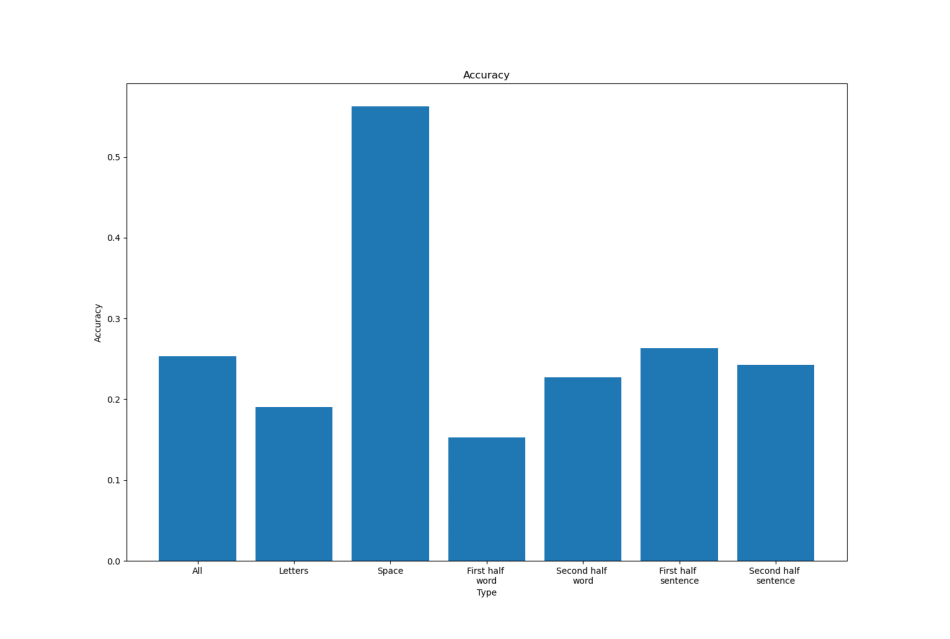

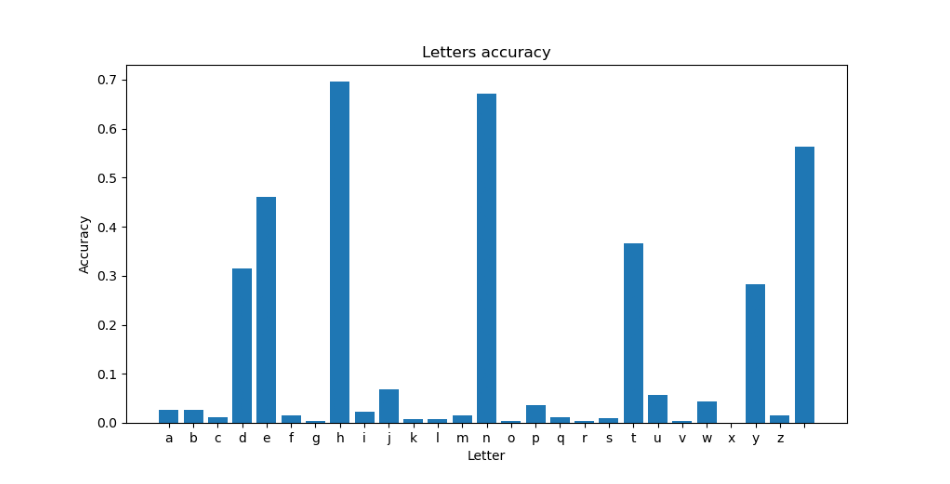

In [10]:
img = plt.imread('../models/text8_only/model_2/evaluation/accuracy_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

img = plt.imread('../models/text8_only/model_2/evaluation/letters_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Sentence for example

In [11]:
path_file = '../models/text8_only/model_2/evaluation/restored_sentences.txt'

num_example = 5
with open(path_file, 'r') as file:
    for i in range(num_example*4):
        print(file.readline()[:-1])

Original: everytime you think undercover brother has run out of steam it finds a new way to surprise and amuse
Restored: e e e hne t ntthendettd  ehne eteenhe eten tetdtnthtn t h netnht nd  tntd hthn thnt teeen  tnd tnet 
Accuracy: 0.2300 | Letters accuracy: 0.1951 | Backspace accuracy: 0.3889 | First half word accuracy: 0.1463 | Second half word accuracy: 0.2439

Original: part of the charm of satin rouge is that it avoids the obvious with humour and lightness
Restored: penehtn the theneetn t nhndtent  tn thenhtnhtnenn  the tneennt thnhetetentetnd tyn ehd  
Accuracy: 0.2614 | Letters accuracy: 0.1944 | Backspace accuracy: 0.5625 | First half word accuracy: 0.1667 | Second half word accuracy: 0.2222

Original: manages to be original even though it rips off many of its ideas
Restored: mendn   thnte tnen ndnyt e dthent etnhtene tn  tend tn tnh tn  n
Accuracy: 0.2500 | Letters accuracy: 0.1731 | Backspace accuracy: 0.5833 | First half word accuracy: 0.1923 | Second half word accuracy: 0.1

## Sentences Model

Sentences model is a transformer model that is trained on the 'sentences IMDB' dataset by myself.

### Model 1

#### Parameters

In [12]:
file_path = '../models/sentences_only/model_1/model_params.txt'
with open(file_path, 'r') as file:
    print(file.read())

Embed size: 512
Number of heads: 8
Number of layers: 8
Number of hidden units: 1024
Dropout: 0.2
BPTT: 100


#### Loss

In [13]:
file_path = '../models/sentences_only/model_1/log.txt'
with open(file_path, 'r') as file:
    print(file.read())

Starting training...
------------------------------------------------------------------------------------------
| end of epoch   1 | time: 11.84s | valid loss  2.89 | valid accuracy  0.17 | valid perplexity 17.92
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   2 | time: 10.89s | valid loss  2.86 | valid accuracy  0.17 | valid perplexity 17.45
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   3 | time: 10.89s | valid loss  2.84 | valid accuracy  0.17 | valid perplexity 17.15
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   4 | time: 10.86s | val

#### Evaluation

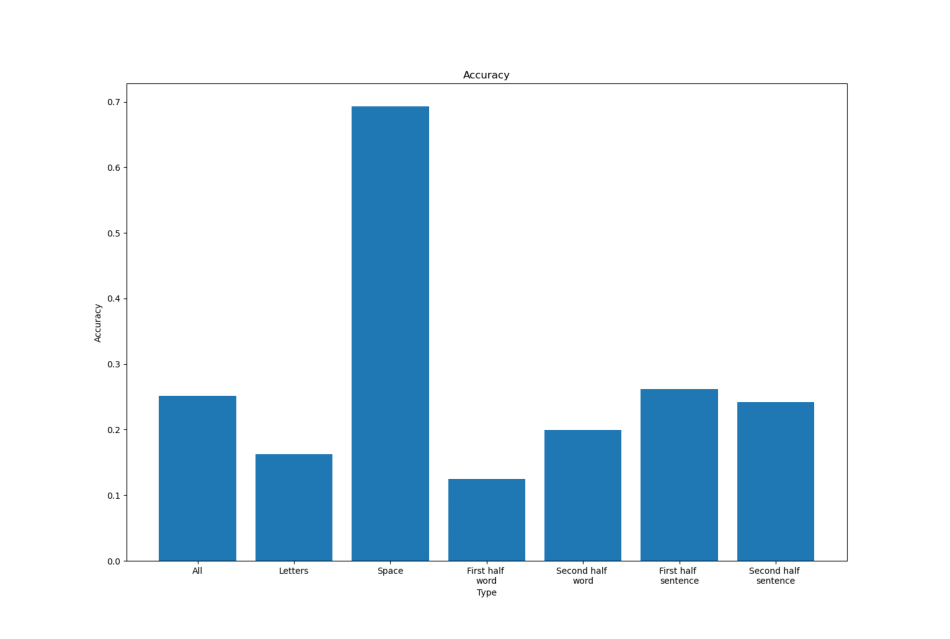

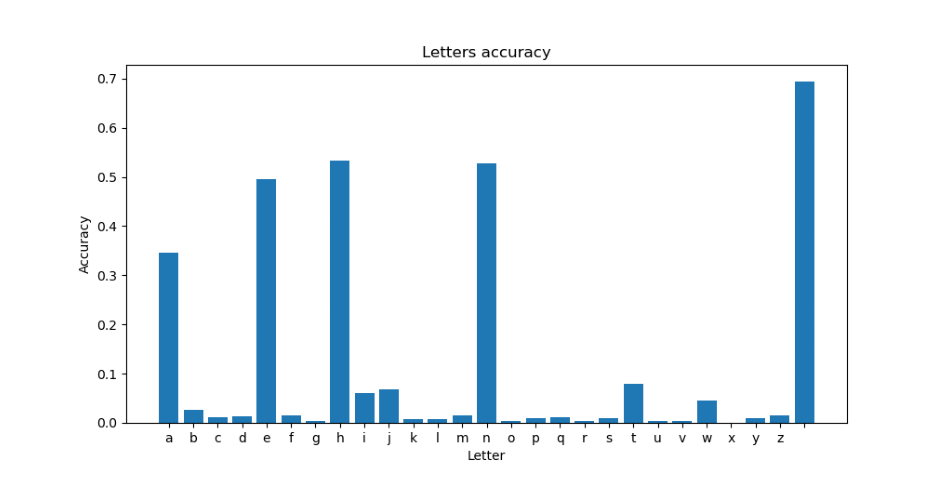

In [14]:
img = plt.imread('../models/sentences_only/model_1/evaluation/accuracy_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

img = plt.imread('../models/sentences_only/model_1/evaluation/letters_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Sentence for example

In [15]:
path_file = '../models/sentences_only/model_1/evaluation/restored_sentences.txt'

num_example = 5
with open(path_file, 'r') as file:
    for i in range(num_example*4):
        print(file.readline()[:-1])

Original: everytime you think undercover brother has run out of steam it finds a new way to surprise and amuse
Restored: e e e hne a  tahen  at   ee e ea e he eaen aet a tha  a h neanha n   ana  iain ah a teeen  an  anet 
Accuracy: 0.2400 | Letters accuracy: 0.1707 | Backspace accuracy: 0.5556 | First half word accuracy: 0.1220 | Second half word accuracy: 0.2195

Original: part of the charm of satin rouge is that it avoids the obvious with humour and lightness
Restored: peneha  ahe aeeneea  a nhn ae t  an ahenhanhane n  ahe a  en t ainheaete tean  aen eh   
Accuracy: 0.2500 | Letters accuracy: 0.1667 | Backspace accuracy: 0.6250 | First half word accuracy: 0.1389 | Second half word accuracy: 0.1944

Original: manages to be original even though it rips off many of its ideas
Restored: men n   ah a  a en n nea e  ahe t eanhaene a   aen  a  anh an  n
Accuracy: 0.2344 | Letters accuracy: 0.1154 | Backspace accuracy: 0.7500 | First half word accuracy: 0.1154 | Second half word accuracy: 0.1

### Model 2

#### Parameters

In [16]:
file_path = '../models/sentences_only/model_2/model_params.txt'
with open(file_path, 'r') as file:
    print(file.read())

Embed size: 512
Number of heads: 8
Number of layers: 12
Number of hidden units: 2048
Dropout: 0.1
BPTT: 100


#### Loss

In [17]:
file_path = '../models/sentences_only/model_2/log.txt'
with open(file_path, 'r') as file:
    print(file.read())

Starting training...
------------------------------------------------------------------------------------------
| end of epoch   1 | time: 14.07s | valid loss  2.89 | valid accuracy  0.17 | valid perplexity 18.02
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   2 | time: 14.17s | valid loss  2.88 | valid accuracy  0.17 | valid perplexity 17.74
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   3 | time: 14.57s | valid loss  2.86 | valid accuracy  0.17 | valid perplexity 17.43
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   4 | time: 14.46s | val

#### Evaluation

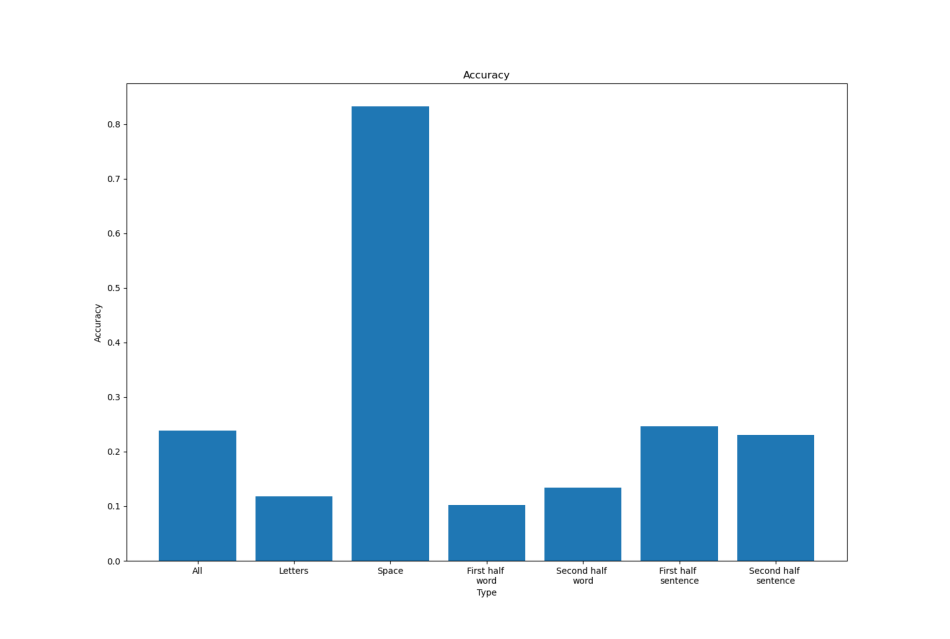

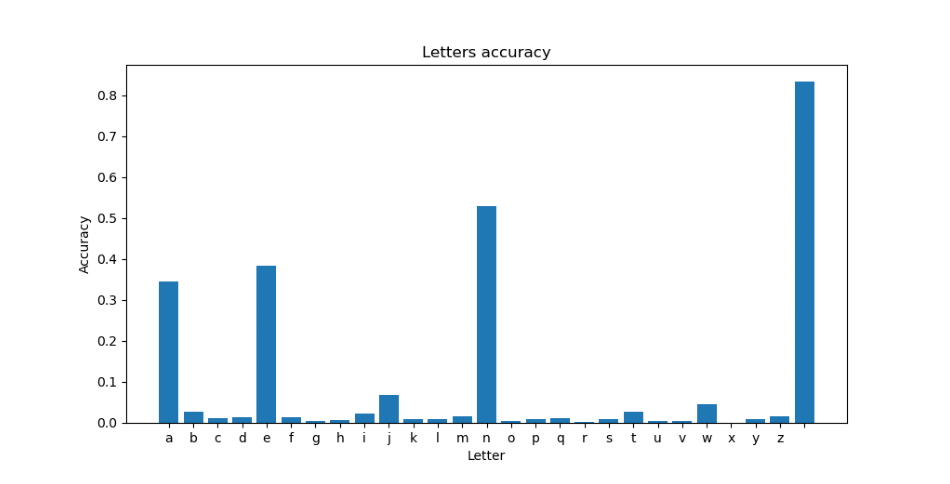

In [18]:
img = plt.imread('../models/sentences_only/model_2/evaluation/accuracy_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

img = plt.imread('../models/sentences_only/model_2/evaluation/letters_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Sentence for example

In [19]:
path_file = '../models/sentences_only/model_2/evaluation/restored_sentences.txt'

num_example = 5
with open(path_file, 'r') as file:
    for i in range(num_example*4):
        print(file.readline()[:-1])

Original: everytime you think undercover brother has run out of steam it finds a new way to surprise and amuse
Restored: e e e  ne a   a  n  a    ee e eaee    ea n ae  a   a  a   nean a n   ana   a n a  a  eeen  an  ane  
Accuracy: 0.2400 | Letters accuracy: 0.1220 | Backspace accuracy: 0.7778 | First half word accuracy: 0.0976 | Second half word accuracy: 0.1463

Original: part of the charm of satin rouge is that it avoids the obvious with humour and lightness
Restored: pene a  a   ae neea  a n n ae    an a  n an ane n  a   a een   a n  a  e  ean  aen      
Accuracy: 0.2159 | Letters accuracy: 0.0694 | Backspace accuracy: 0.8750 | First half word accuracy: 0.0833 | Second half word accuracy: 0.0556

Original: manages to be original even though it rips off many of its ideas
Restored: men n   a  ae a en n nea e  a      an aene a   aen  a  an  an  n
Accuracy: 0.2656 | Letters accuracy: 0.1154 | Backspace accuracy: 0.9167 | First half word accuracy: 0.0769 | Second half word accuracy: 0.1

### Model 3

#### Parameters

In [20]:
file_path = '../models/sentences_only/model_3/model_params.txt'
with open(file_path, 'r') as file:
    print(file.read())

Embed size: 256
Number of heads: 4
Number of layers: 4
Number of hidden units: 1024
Dropout: 0.2
BPTT: 100


#### Loss

In [21]:
file_path = '../models/sentences_only/model_3/log.txt'
with open(file_path, 'r') as file:
    print(file.read())

Starting training...
------------------------------------------------------------------------------------------
| end of epoch   1 | time:  6.68s | valid loss  2.81 | valid accuracy  0.21 | valid perplexity 16.60
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   2 | time:  6.81s | valid loss  2.72 | valid accuracy  0.22 | valid perplexity 15.21
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   3 | time:  6.56s | valid loss  2.67 | valid accuracy  0.22 | valid perplexity 14.43
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   4 | time:  6.59s | val

#### Evaluation

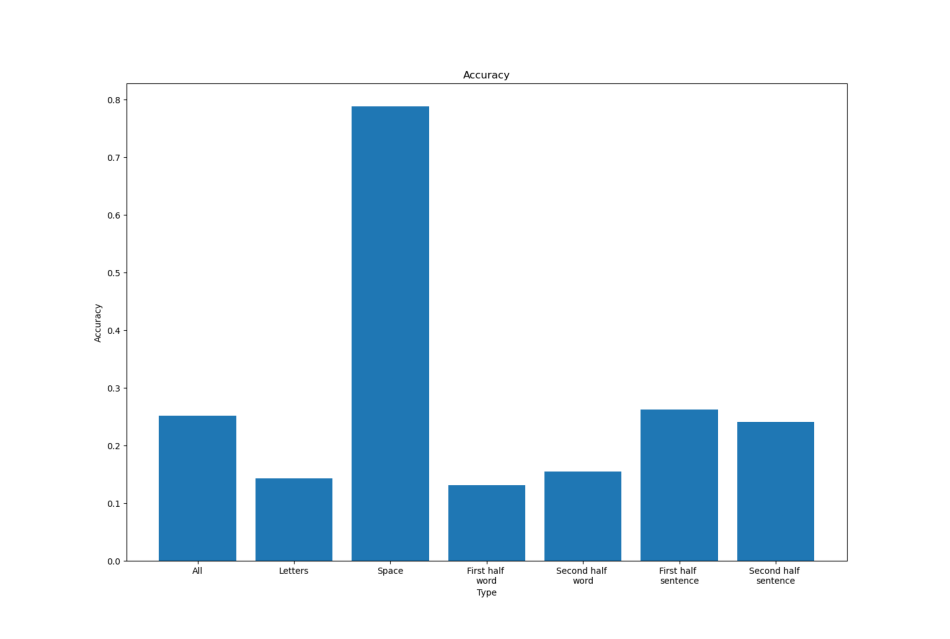

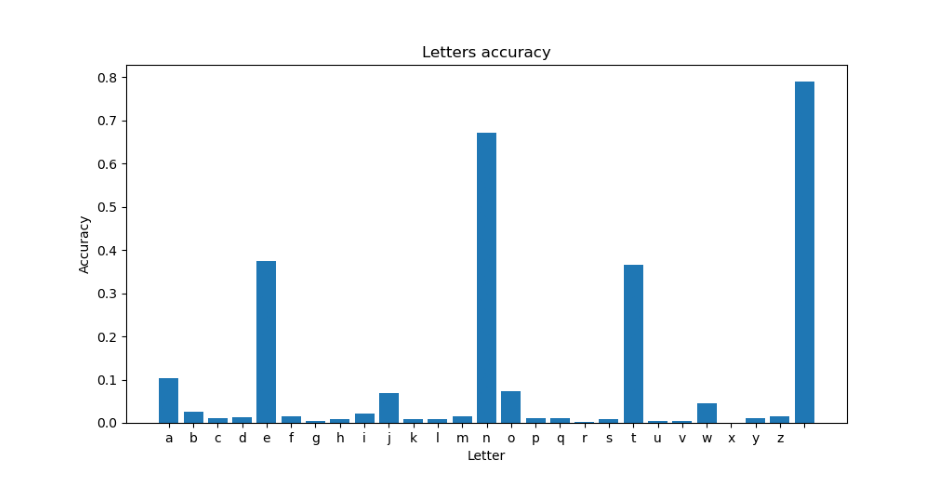

In [22]:
img = plt.imread('../models/sentences_only/model_3/evaluation/accuracy_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

img = plt.imread('../models/sentences_only/model_3/evaluation/letters_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Sentence for example

In [23]:
path_file = '../models/sentences_only/model_3/evaluation/restored_sentences.txt'

num_example = 5
with open(path_file, 'r') as file:
    for i in range(num_example*4):
        print(file.readline()[:-1])

Original: everytime you think undercover brother has run out of steam it finds a new way to surprise and amuse
Restored: e e e  na t ntt en  tt   eone eteen e eten tet tnt tn t   natn t n   tnt   t n t nt teeen  tn  tnat 
Accuracy: 0.2300 | Letters accuracy: 0.1341 | Backspace accuracy: 0.6667 | First half word accuracy: 0.0976 | Second half word accuracy: 0.1707

Original: part of the charm of satin rouge is that it avoids the obvious with humour and lightness
Restored: pene tn t e toeneatn t n n tent  tn t en tn tnenn  t e tneennt t n etetantetn  t n e    
Accuracy: 0.2386 | Letters accuracy: 0.1111 | Backspace accuracy: 0.8125 | First half word accuracy: 0.1111 | Second half word accuracy: 0.1111

Original: manages to be original even though it rips off many of its ideas
Restored: man n   t nte tnen n n t e  t ent etn tene tn  tan  tn tn  tn  n
Accuracy: 0.3125 | Letters accuracy: 0.1923 | Backspace accuracy: 0.8333 | First half word accuracy: 0.2308 | Second half word accuracy: 0.1

### Model 4

#### Parameters

In [24]:
file_path = '../models/sentences_only/model_4/model_params.txt'
with open(file_path, 'r') as file:
    print(file.read())

Embed size: 512
Number of heads: 8
Number of layers: 8
Number of hidden units: 1024
Dropout: 0.1
BPTT: 150


#### Loss

In [25]:
file_path = '../models/sentences_only/model_4/log.txt'
with open(file_path, 'r') as file:
    print(file.read())

Starting training...
------------------------------------------------------------------------------------------
| end of epoch   1 | time:  7.45s | valid loss  2.85 | valid accuracy  0.17 | valid perplexity 17.22
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   2 | time:  7.61s | valid loss  2.79 | valid accuracy  0.20 | valid perplexity 16.32
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   3 | time:  7.61s | valid loss  2.74 | valid accuracy  0.21 | valid perplexity 15.43
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   4 | time:  7.58s | val

#### Evaluation

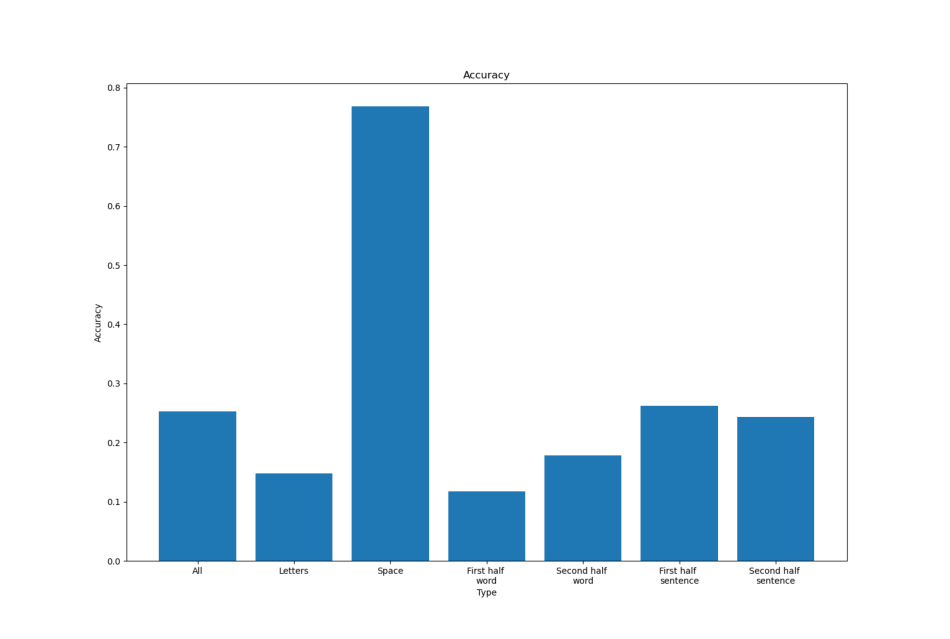

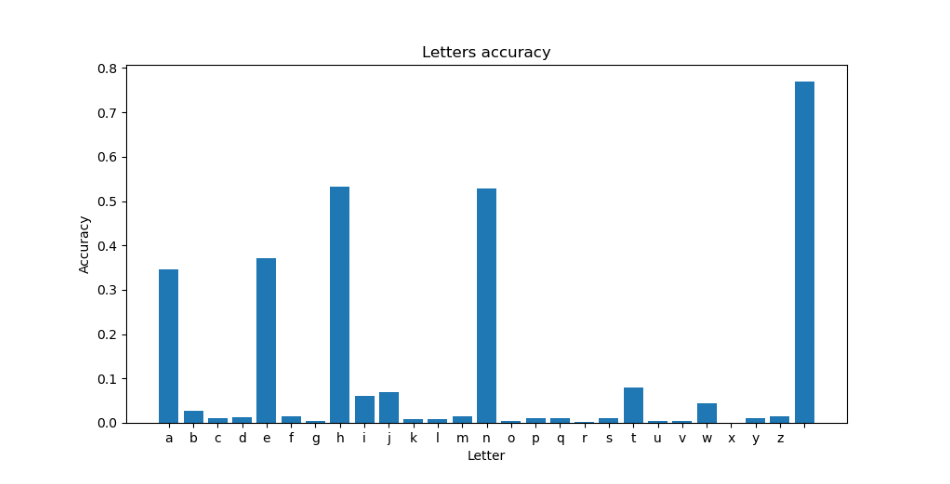

In [26]:
img = plt.imread('../models/sentences_only/model_4/evaluation/accuracy_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

img = plt.imread('../models/sentences_only/model_4/evaluation/letters_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Sentence for example

In [27]:
path_file = '../models/sentences_only/model_4/evaluation/restored_sentences.txt'

num_example = 5
with open(path_file, 'r') as file:
    for i in range(num_example*4):
        print(file.readline()[:-1])

Original: everytime you think undercover brother has run out of steam it finds a new way to surprise and amuse
Restored: e e   hne a  tahen  at    e e  ae  he  aen a t a tha  a h neanha n   ana  iain ah a t e n  an  anet 
Accuracy: 0.2600 | Letters accuracy: 0.1707 | Backspace accuracy: 0.6667 | First half word accuracy: 0.1220 | Second half word accuracy: 0.2195

Original: part of the charm of satin rouge is that it avoids the obvious with humour and lightness
Restored: pen ha  ahe aeen ea  a nhn a  t  an ahenhanhane n  ahe a een t ainheaete t an  a n eh   
Accuracy: 0.2614 | Letters accuracy: 0.1667 | Backspace accuracy: 0.6875 | First half word accuracy: 0.1389 | Second half word accuracy: 0.1944

Original: manages to be original even though it rips off many of its ideas
Restored: men n   ah ae a  n n n a e  ahe t eanha ne a   aen  a  anh an  n
Accuracy: 0.2656 | Letters accuracy: 0.1346 | Backspace accuracy: 0.8333 | First half word accuracy: 0.1154 | Second half word accuracy: 0.1

### Model 5

#### Parameters

In [28]:
file_path = '../models/sentences_only/model_5/model_params.txt'
with open(file_path, 'r') as file:
    print(file.read())

Embed size: 1024
Number of heads: 8
Number of layers: 16
Number of hidden units: 2048
Dropout: 0.2
BPTT: 150


#### Loss

In [29]:
file_path = '../models/sentences_only/model_5/log.txt'
with open(file_path, 'r') as file:
    print(file.read())

Starting training...
------------------------------------------------------------------------------------------
| end of epoch   1 | time: 29.79s | valid loss  2.93 | valid accuracy  0.17 | valid perplexity 18.77
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   2 | time: 29.91s | valid loss  2.92 | valid accuracy  0.17 | valid perplexity 18.50
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   3 | time: 29.79s | valid loss  2.91 | valid accuracy  0.17 | valid perplexity 18.42
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| end of epoch   4 | time: 29.83s | val

#### Evaluation

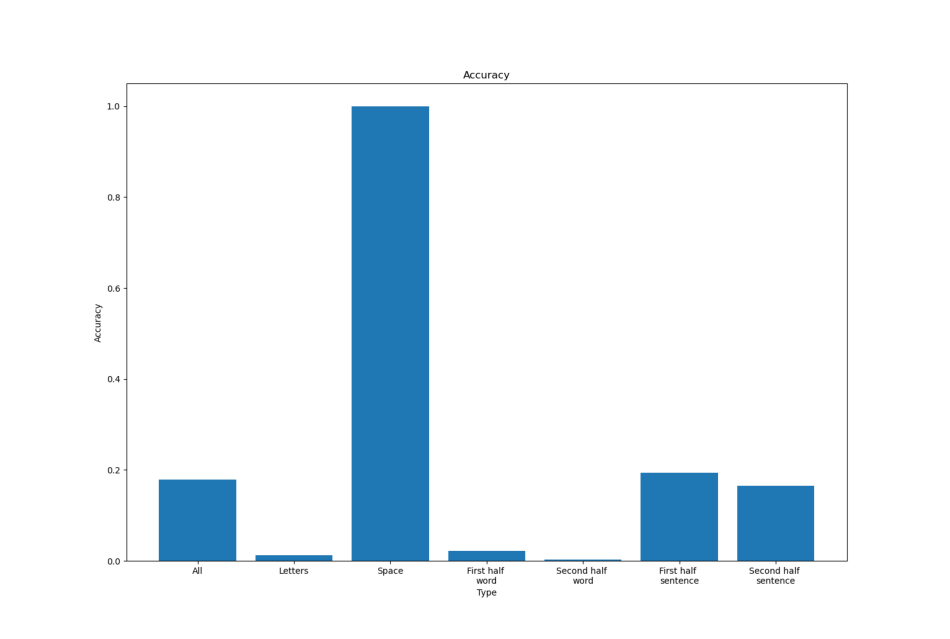

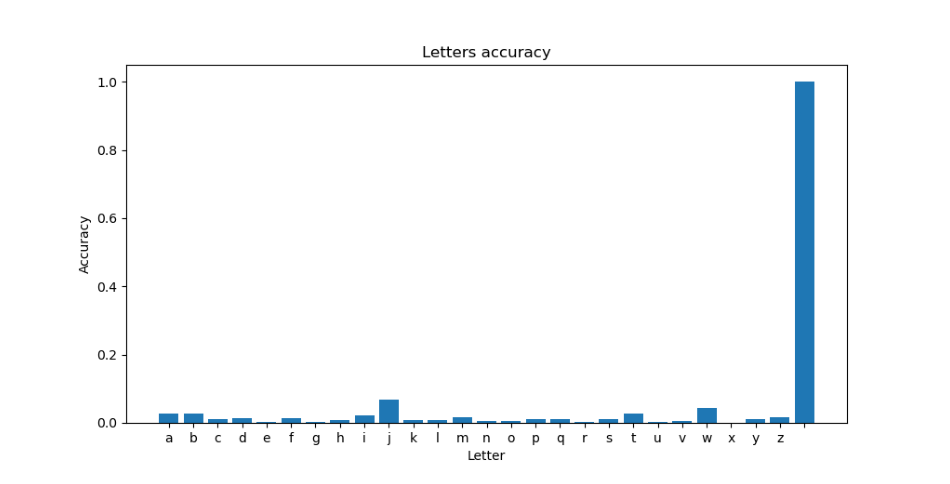

In [30]:
img = plt.imread('../models/sentences_only/model_5/evaluation/accuracy_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

img = plt.imread('../models/sentences_only/model_5/evaluation/letters_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Sentence for example

In [31]:
path_file = '../models/sentences_only/model_5/evaluation/restored_sentences.txt'

num_example = 5
with open(path_file, 'r') as file:
    for i in range(num_example*4):
        print(file.readline()[:-1])

Original: everytime you think undercover brother has run out of steam it finds a new way to surprise and amuse
Restored: e                                                                                                   
Accuracy: 0.1900 | Letters accuracy: 0.0122 | Backspace accuracy: 1.0000 | First half word accuracy: 0.0244 | Second half word accuracy: 0.0000

Original: part of the charm of satin rouge is that it avoids the obvious with humour and lightness
Restored: p                                                                                       
Accuracy: 0.1932 | Letters accuracy: 0.0139 | Backspace accuracy: 1.0000 | First half word accuracy: 0.0278 | Second half word accuracy: 0.0000

Original: manages to be original even though it rips off many of its ideas
Restored: m                                                               
Accuracy: 0.2031 | Letters accuracy: 0.0192 | Backspace accuracy: 1.0000 | First half word accuracy: 0.0385 | Second half word accuracy: 0.0

## Best Model

The best model was the reformer model, which achieved the highest accuracy on the test set. The model was pre-trained on the 'enwik8' dataset and fine-tuned on the 'sentences IMDB' dataset. The model architecture is based on the transformer architecture with locality-sensitive hashing (LSH) to reduce memory complexity. The results of the model are as follows:

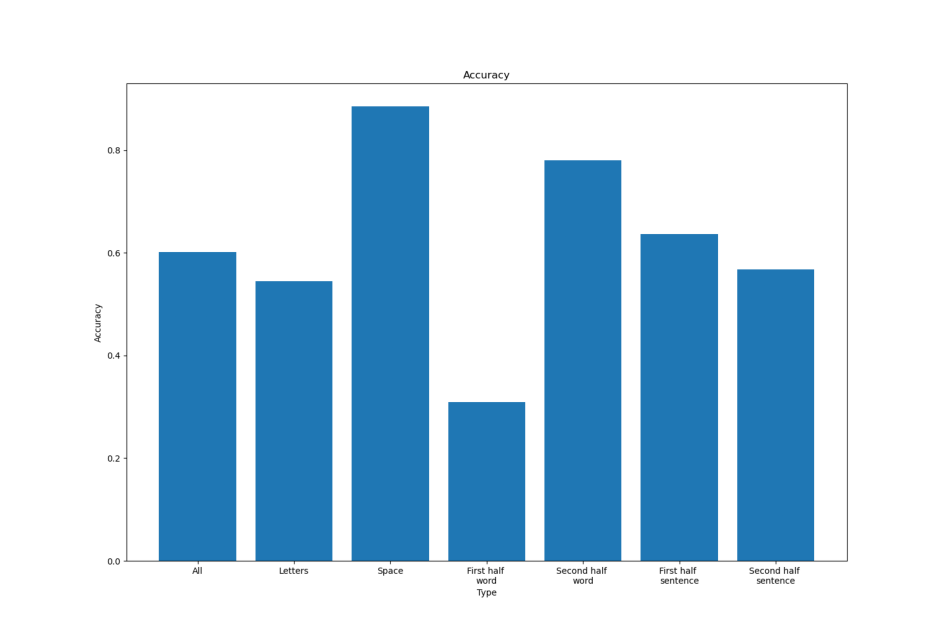

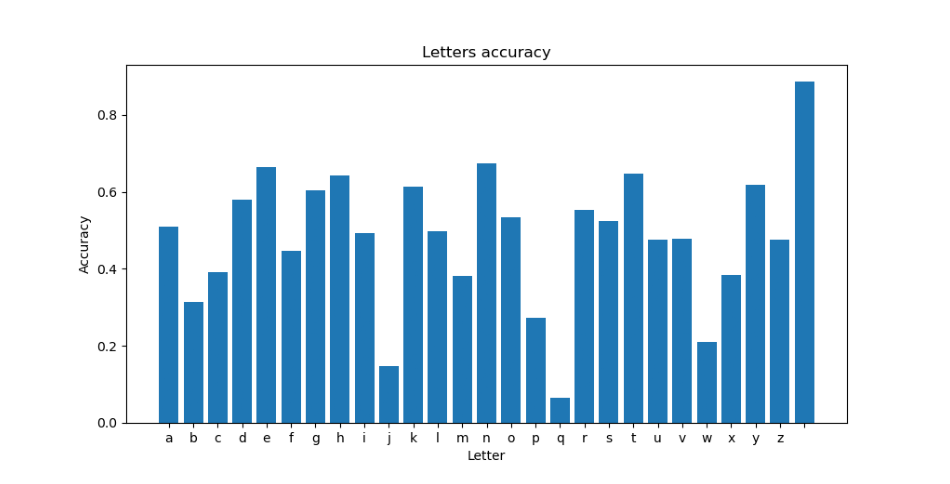

In [32]:
img = plt.imread('../models/reformer/model_1/evaluation/accuracy_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

img = plt.imread('../models/reformer/model_1/evaluation/letters_hist.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

Analysis of the results:
1. The model achieved higher accuracy on the space character compared to other characters. That is because the space character is the most frequent character in the dataset.
2. The model achieved higher accuracy on the character located in the first half positions of the word compared to the second half. This is because the model has more context information about the first half of the word compared to the second half.
3. The model didn't achieve higher accuracy on the character located in the second half of the sentence compared to its first half. The model operates on a character-level, and it doesn't have information about the sentence structure. Therefore, it is more likely to learn from the current word or the word before it, rather than the sentence itself.
4. Letters with higher frequency in the dataset achieved higher accuracy compared to letters with lower frequency. This is because the model has more examples of the high-frequency letters to learn from.

## Future Work

1. Train the model on larger datasets to improve its performance.
2. Use CTC loss in order to gain better accuracy for less frequent characters.
3. Implement a beam search algorithm to generate better sentences.